In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices("CPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) #regulates te memory growth of the cpu to avoid OOM errors

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
 # to remove dodgy images.
img_exts =['jpeg','jpg', 'bmp','png']

In [ ]:
os.listdir(os.path.join(data_dir,'e waste'))

In [ ]:
img = cv2.imread(os.path.join('data','e waste','7l6gcnrb6u3w4hna_1634218623.jpeg')) 
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                print('Issue with image {}'.format(image_path)) 
                

Issue with image data\ewaste\.ipynb_checkpoints


In [8]:
tf.keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [9]:
import numpy as np

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')
print(data.class_names)

Found 506 files belonging to 2 classes.
['bio plastics', 'ewaste']


In [11]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [13]:
batch = data_iterator.next()

# 0 - Bio-Plastics
# 1 - E-waste

In [14]:
batch[1]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

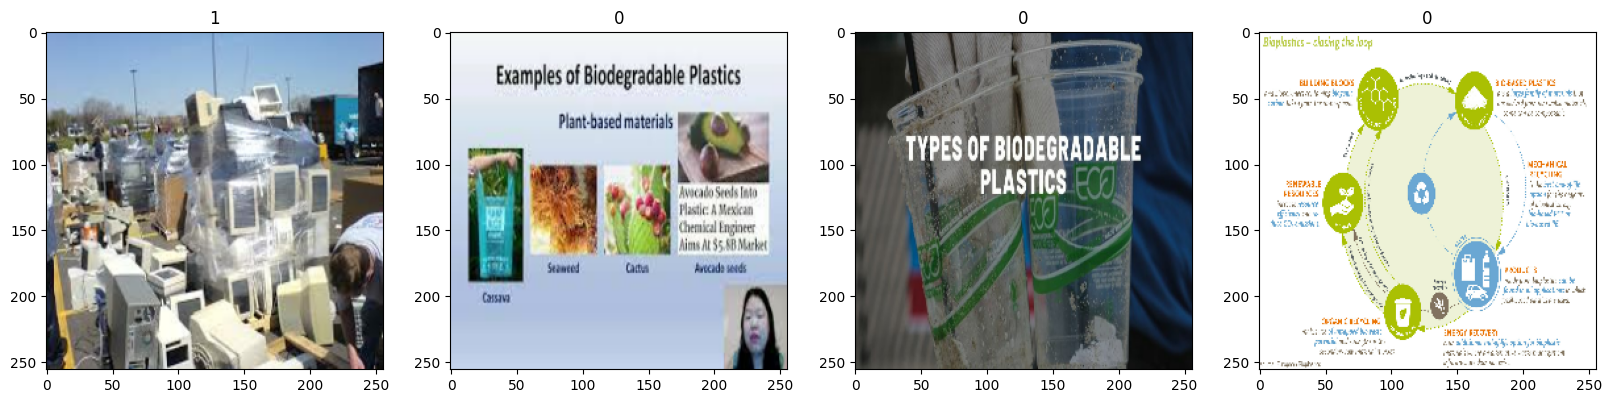

In [15]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# DATA PREPROCESSING

### In order to scale the images(data) divide the batch data by the maximum value.This returns a dataset with a range of 0-1 which in term helps us to create an optimised deep learning model

In [16]:
scale = batch[0]/255.0
scale[0].max()

1.0

In [17]:
data = data.map(lambda x,y:(x/255,y))

In [18]:
data.as_numpy_iterator().next()[0].max()

1.0

In [19]:
len(data)

16

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep learning model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(32, (3,3), 1,activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
          

In [25]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [27]:
logdir = 'logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 15s 1s/step - loss: 0.9525 - accuracy: 0.5028 - val_loss: 0.7300 - val_accuracy: 0.5208
Epoch 2/20
11/11 [==============================] - 17s 1s/step - loss: 0.6937 - accuracy: 0.5540 - val_loss: 0.6786 - val_accuracy: 0.7604
Epoch 3/20
11/11 [==============================] - 19s 2s/step - loss: 0.6590 - accuracy: 0.6705 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 19s 2s/step - loss: 0.5617 - accuracy: 0.7330 - val_loss: 0.4896 - val_accuracy: 0.7708
Epoch 5/20
11/11 [==============================] - 19s 2s/step - loss: 0.4792 - accuracy: 0.7699 - val_loss: 0.4540 - val_accuracy: 0.8021
Epoch 6/20
11/11 [==============================] - 19s 2s/step - loss: 0.4181 - accuracy: 0.8040 - val_loss: 0.3649 - val_accuracy: 0.8542
Epoch 7/20
11/11 [==============================] - 19s 2s/step - loss: 0.3327 - accuracy: 0.8693 - val_loss: 0.2612 - val_accuracy: 0.8750
Epoch 8/20
11/11 [==

In [31]:
hist.history

{'loss': [0.9524986147880554,
  0.6936591267585754,
  0.6589726805686951,
  0.5617050528526306,
  0.4792109429836273,
  0.4181457757949829,
  0.3327270746231079,
  0.31048285961151123,
  0.19787727296352386,
  0.1375635862350464,
  0.11122551560401917,
  0.1024976521730423,
  0.13761943578720093,
  0.10205704718828201,
  0.09644777327775955,
  0.07631762325763702,
  0.10367012023925781,
  0.03502160683274269,
  0.04681043699383736,
  0.04078387841582298],
 'accuracy': [0.5028409361839294,
  0.5539772510528564,
  0.6704545617103577,
  0.7329545617103577,
  0.7698863744735718,
  0.8039772510528564,
  0.8693181872367859,
  0.8636363744735718,
  0.9176136255264282,
  0.9517045617103577,
  0.9659090638160706,
  0.96875,
  0.96875,
  0.9659090638160706,
  0.9772727489471436,
  0.9715909361839294,
  0.9715909361839294,
  0.9943181872367859,
  0.9801136255264282,
  0.9914772510528564],
 'val_loss': [0.7299628257751465,
  0.6786103248596191,
  0.7159178853034973,
  0.48961368203163147,
  0.4539

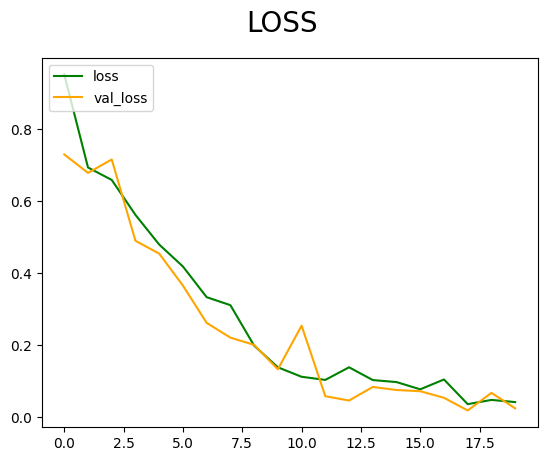

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'green', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend(loc='upper left')
plt.show()

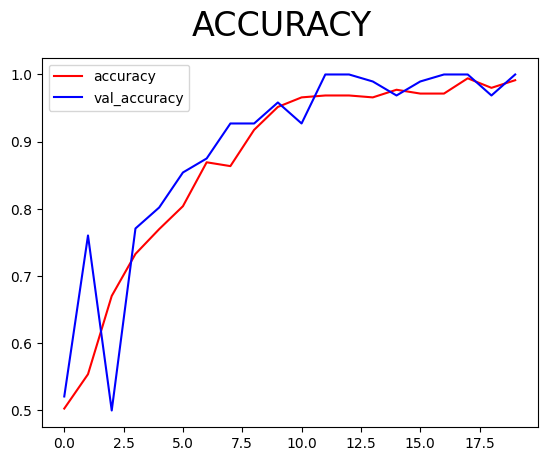

In [38]:
fig =plt.figure()
plt.plot(hist.history['accuracy'], color = 'red' , label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue' , label = 'val_accuracy')
plt.suptitle("ACCURACY",fontsize=24)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
P = Precision()
R = Recall()
B = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred = model.predict(x)
    P.update_state(y, y_pred)
    R.update_state(y, y_pred)
    B.update_state(y,y_pred)

1/1 [==============================] - 0s 447ms/step


In [43]:
c = (f'Precision:{P.result().numpy()}, Recall:{R.result().numpy()}, Accuracy:{B.result().numpy()}')
print(c)

Precision:1.0, Recall:1.0, Accuracy:1.0


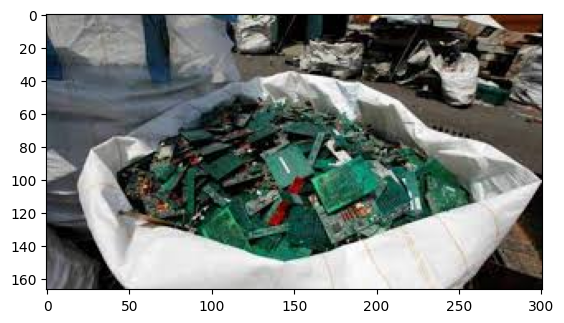

In [64]:
img=cv2.imread("ewaste_test.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

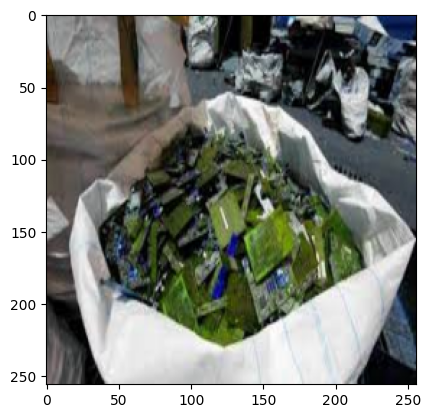

In [65]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 62ms/step


In [67]:
y_pred

array([[0.99992687]], dtype=float32)

In [68]:
if y_pred<0.5:
    print("It is a bio-plastic")
else:
    print("It is an e-waste")

It is an e-waste


# SAVING THE MODEL(.Keras)

In [14]:
from tensorflow.keras.models import load_model
import os
import numpy as np

In [73]:
model.save(os.path.join('models','Waste_management.keras'),save_format='keras')

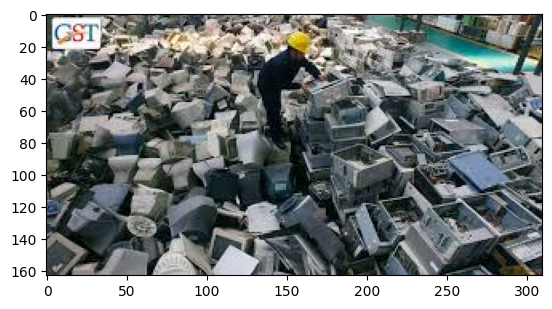

In [20]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("test3.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

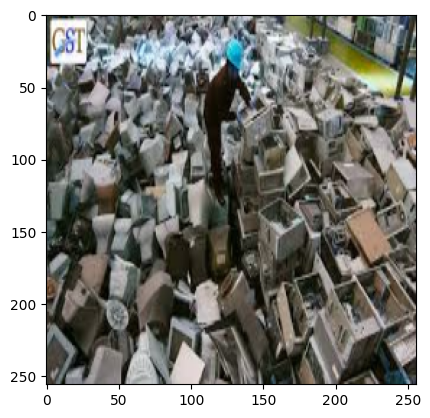

In [21]:
import tensorflow as tf
j = tf.image.resize(img,(256,256))
plt.imshow(j.numpy().astype(int))
plt.show()

## To load the model  

=> new_model = load_model(os.path.join('folder name', 'model_name'))

prediction:
y-pred = new_modle.predict(np.expand_dims(resize/255,0))

In [22]:
new_model = load_model(os.path.join('models', 'Waste_management.keras'))
y_pred = new_model.predict(np.expand_dims(j/255,0))
y_pred

1/1 [==============================] - 0s 204ms/step


array([[0.99991393]], dtype=float32)